In [85]:
import pandas as pd

In [86]:
data=pd.read_csv('Company Stock and Investment.csv')

In [87]:
data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [88]:
data.shape

(1984, 5)

In [89]:
data.drop(['Other sharesInvestments'], axis=1 ,inplace =True)

In [90]:
data.isnull().sum()

Date                0
Oil Investments     0
Gold Investments    0
Comp Stock          0
dtype: int64

In [91]:
data['Oil Investments']

0       0.025417
1       0.026830
2       0.002699
3       0.021688
4      -0.006256
          ...   
1979    0.005984
1980   -0.007173
1981    0.000352
1982   -0.019376
1983   -0.007006
Name: Oil Investments, Length: 1984, dtype: float64

In [92]:
df=pd.DataFrame(data, columns=['Date','Oil Investments'])

In [93]:
df

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
...,...,...
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376


In [94]:
import numpy as np
from scipy.stats import zscore
zs=np.abs(zscore(df['Oil Investments']))
zs

array([0.83768566, 0.88345251, 0.10154433, ..., 0.02551751, 0.61375342,
       0.21290234])

In [95]:
df=df[(zs<3)]


In [96]:
df.shape

(1975, 2)

In [97]:
df['Oil Investments']=np.square(df['Oil Investments']+0.001)

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
import numpy as np
for i in range(0,len(df['Oil Investments'])):
    if df['Oil Investments'].values[i]<=0:
        #print(i)
        df['Oil Investments'][i]=np.square(df['Oil Investments'][i]+0.001)


C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


KeyError: 1527

In [98]:
df.describe()

,Oil Investments
count,1.975000e+03
mean,4.082025e-04
std,8.112423e-04
min,1.531159e-10
25%,2.591195e-05
50%,1.232140e-04
75%,4.242391e-04
max,8.458354e-03


In [124]:
print(df.index.min())
print(df.index.max())

01-02-2010
31-12-2015


In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [108]:
df = df.set_index('Date')
df.index

Index(['31-12-2009', '04-01-2010', '05-01-2010', '06-01-2010', '07-01-2010',
       '08-01-2010', '11-01-2010', '12-01-2010', '13-01-2010', '14-01-2010',
       ...
       '02-11-2017', '03-11-2017', '06-11-2017', '07-11-2017', '08-11-2017',
       '09-11-2017', '10-11-2017', '13-11-2017', '14-11-2017', '15-11-2017'],
      dtype='object', name='Date', length=1975)

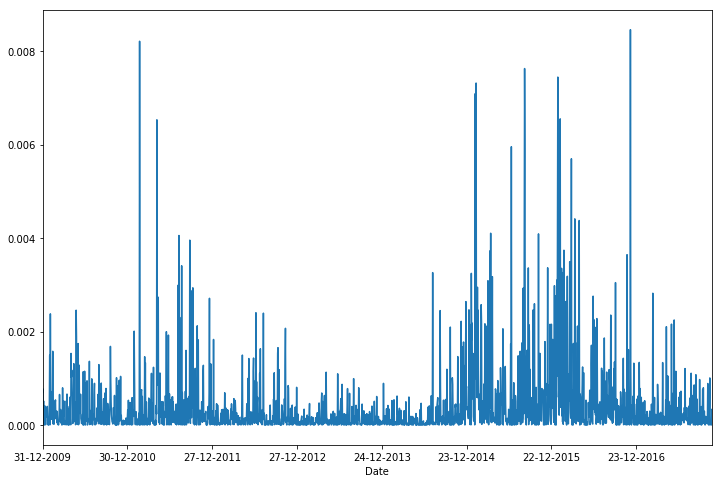

In [109]:
import matplotlib.pyplot as plt
df['Oil Investments'].plot(figsize=(12,8))
plt.show()

In [110]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Oil Investments']) # adfuller give us 5 values
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-6.1114253946086174, 9.312741261209897e-08, 15, 1959, {'1%': -3.433692465214729, '5%': -2.8630165042063163, '10%': -2.567556030574193}, -22423.395463348606)


In [111]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(investment):
    result=adfuller(investment) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [112]:
adfuller_test(df['Oil Investments'])

ADF Test Statistic : -6.1114253946086174
p-value : 9.312741261209897e-08
#Lags Used : 15
Number of Observations Used : 1959
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\matplotlib\pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


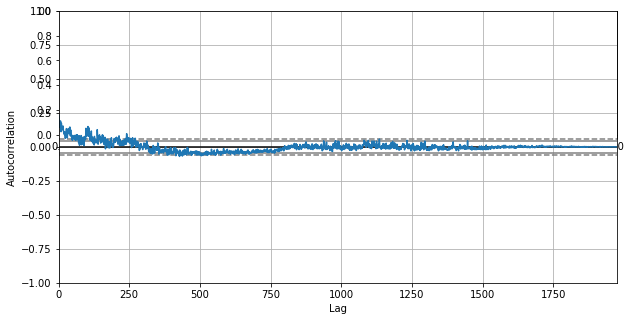

In [106]:
from pandas.plotting import autocorrelation_plot
fig =plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
autocorrelation_plot(df['Oil Investments'])
plt.show()

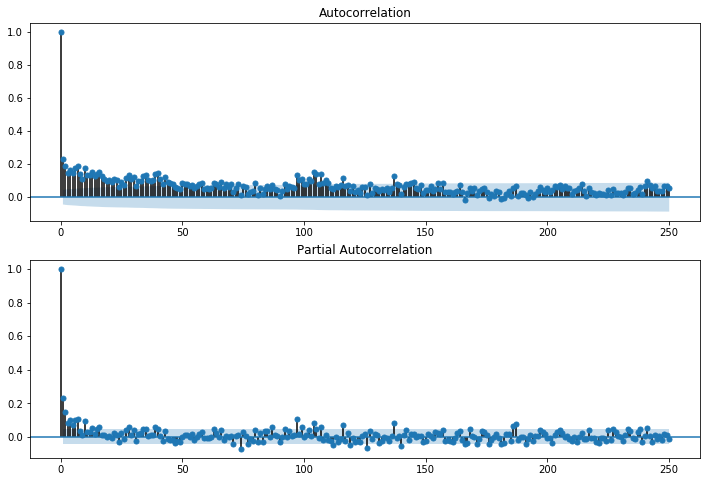

In [114]:
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Oil Investments'],lags=250,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Oil Investments'],lags=250,ax=ax2)

In [ ]:
data.index[1983]

In [115]:
from statsmodels.tsa.arima_model import ARIMA

In [116]:
model=ARIMA(df['Oil Investments'],order=(5,0,5)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [117]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        Oil Investments   No. Observations:                 1975
Model:                     ARMA(5, 5)   Log Likelihood               11393.129
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 28 Oct 2020   AIC                         -22762.259
Time:                        22:13:02   BIC                         -22695.199
Sample:                             0   HQIC                        -22737.620
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0004    8.1e-05      4.953      0.000       0.000       0.001
ar.L1.Oil Investments     0.4509      0.147      3.071      0.002       0.163       0.739
ar.L2.Oil Investments    -0.7157      0.170     -4.199      0.000      -1.050      -0.382
ar.L3.Oil Investments     0.8865      0.056     15.695      0.000       0.776       0.997
ar.L4.Oil Investments    -0.3470      0.139     -2.506      0.012      -0.618      -0.076
ar.L5.Oil Investments     0.6592      0.151      4.369      0.000       0.364       0.955
ma.L1.Oil Investments    -0.3166      0.142     -2.224      0.026      -0.596      -0.038
ma.L2.Oil Investments     0.7549      0.155      4.877      0.000       0.451       1.058
ma.L3.Oil Investments    -0.8000      0.051    -15.549      0.000      -0.901      -0.699
ma.L4.Oil Investments     0.3462      0.132      2.622      0.009       0.087       0.605
ma.L5.Oil Investments    -0.6629      0.133     -4.988      0.000      -0.923      -0.402
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0178           -0.0000j            1.0178           -0.0000
AR.2           -0.5315           -0.9098j            1.0537           -0.3341
AR.3           -0.5315           +0.9098j            1.0537            0.3341
AR.4            0.2858           -1.1228j            1.1586           -0.2103
AR.5            0.2858           +1.1228j            1.1586            0.2103
MA.1            1.0864           -0.0000j            1.0864           -0.0000
MA.2           -0.5367           -0.8873j            1.0370           -0.3366
MA.3           -0.5367           +0.8873j            1.0370            0.3366
MA.4            0.2547           -1.1074j            1.1363           -0.2140
MA.5            0.2547           +1.1074j            1.1363            0.2140
-----------------------------------------------------------------------------
"""

In [118]:
start_index = '08-01-2010'
end_index = '08-01-2019'
#forecast = model_fit.predict(start=start_index, end=end_index)

In [126]:
import datetime
df['forecast']=model_fit.predict(start=start_index, end =end_index)
#model_fit.plot_predict(start=datetime(2014,7,1), end=datetime(2019,12,31))
#plt.show()
df[['Oil Investments','forecast']].plot(figsize=(12,8))

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [ ]:
model=sm.tsa.statespace.SARIMAX(data['Oil Investments'],order=(5, 0, 3),seasonal_order=(5,0,3,0)) #(p,d,q,Shift)
results=model.fit()

In [ ]:
data['forecast']=results.predict(start=100,end=5000, dynamic=True)
data[['Date','Oil Investments','forecast']].plot(figsize=(12,8))

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
data.plot(x='Date', y='Oil Investments' , ax=ax1)
plt.show()

fig =plt.figure(figsize=(20,15))
ax2 = fig.add_subplot(212)
data.plot(x='Date', y='Gold Investments' ,ax=ax2)
plt.show()

fig =plt.figure(figsize=(20,15))
ax3 = fig.add_subplot(212)
data.plot(x='Date', y='Comp Stock' ,ax=ax3)
plt.show()

